In [1]:
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import re
import numpy as np
import seaborn as sn
## for the stats class
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
import timeit 


In [3]:
image_dir = '/home/smmrrr/Fog_Imaging_Project/image_data/'
image_files = os.listdir(image_dir) 
len(image_files)

163011

In [2]:
# fog_labels = pd.read_csv('~/Fog_Imaging_Project/sta251project/manual_fog_labels_aug2015.csv')
# fog_labels = fog_labels.fillna(0)
# df_project_files = pd.DataFrame(project_files, columns = ['image'])
# df_project_files['counts'] = df_project_files.index
# df_project_files = df_project_files.merge(fog_labels, on = 'image')
# df_project_files['fog'] = df_project_files['foggy over ocean ']
# df_project_files['fog_labels'] = np.where(df_project_files['fog'] == 0, 'clear', 'fog')

# df_project_files['fog']

In [5]:


image_dir = '/home/smmrrr/Fog_Imaging_Project/image_data/'
image_files = os.listdir(image_dir) 
print(len(image_files))

project_files = []
size = []
for f in image_files:
    if bool(re.search(r'Jun|Jul|Aug|May|Sep', f)):
        project_files.append(f)     
        im = io.imread(image_dir + f)
        size.append(im.shape)
len(project_files)

In [10]:
size.append(im.shape)


In [12]:
photo_info = pd.DataFrame({'project_files_location' : project_files, 'photo_size' : size})


,project_files_location,photo_size
0,746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00...,"(480, 640)"
1,905736605.Mon.Sep.14_01_30_05.GMT.1998.argus00...,"(480, 640, 3)"
2,1151780400.Sat.Jul.01_19_00_00.GMT.2006.argus0...,"(960, 1280, 3)"
3,995580007.Thu.Jul.19_22_00_07.GMT.2001.argus00...,"(480, 640, 3)"
4,1560808800.Mon.Jun.17_22_00_00.GMT.2019.argus0...,"(960, 1280, 3)"
...,...,...
12832,959965206.Fri.Jun.02_17_00_06.GMT.2000.argus00...,"(480, 640, 3)"
12833,1033412406.Mon.Sep.30_19_00_06.GMT.2002.argus0...,"(480, 640, 3)"
12834,1474578000.Thu.Sep.22_21_00_00.GMT.2016.argus0...,"(960, 1280, 3)"
12835,743954100.Thu.Jul.29_13_55_00.GMT.1993.argus00...,"(480, 640)"


In [6]:
# photo_info.to_csv('/home/smmrrr/Fog_Imaging_Project/all_photos_link.csv', index = False)

In [4]:
photo_info = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/all_photos_link.csv')

# photo_info = photo_info[['project_files_location','photo_size']]
photo_info

,project_files_location,photo_size
0,746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00...,"(480, 640)"
1,905736605.Mon.Sep.14_01_30_05.GMT.1998.argus00...,"(480, 640, 3)"
2,1151780400.Sat.Jul.01_19_00_00.GMT.2006.argus0...,"(960, 1280, 3)"
3,995580007.Thu.Jul.19_22_00_07.GMT.2001.argus00...,"(480, 640, 3)"
4,1560808800.Mon.Jun.17_22_00_00.GMT.2019.argus0...,"(960, 1280, 3)"
...,...,...
68967,802803635.Sat.Jun.10_17_00_35.GMT.1995.argus00...,"(480, 640)"
68968,1408485600.Tue.Aug.19_22_00_00.GMT.2014.argus0...,"(960, 1280, 3)"
68969,842547625.Thu.Sep.12_17_00_25.GMT.1996.argus00...,"(480, 640)"
68970,966366006.Tue.Aug.15_19_00_06.GMT.2000.argus00...,"(480, 640, 3)"


In [16]:
print(np.unique(photo_info['photo_size']))
# size[0:5]

[(480, 640) (480, 640, 3) (960, 1280, 3)]


In [19]:
f = 0
photo_info.loc[f, 'project_files_location']

'746574512.Sat.Aug.28_21_48_32.GMT.1993.argus00.c0.snap.jpg'

In [1]:
# (960, 1280, 3),
#  (480, 640, 3),
#  (480, 640),
start = timeit.default_timer()

for f in range(len(photo_info)):
    im = io.imread(image_dir + photo_info.loc[f, 'project_files_location'])
    # im = im[110:950, :, :]
    if len(im.shape) == 3:
        im = rgb2gray(im)
    if im.shape[0] == 960:
        im = rescale(im, 0.1, anti_aliasing=False)
    else:
        im = rescale(im, 0.2, anti_aliasing=False)

    coeffs = pywt.dwt2(im, 'db6') ## 6 or 8 for daub
    LL, (LH, HL, HH) = coeffs
    if f == 0 :
        wavelet_images = np.hstack((LL,LH, HL, HH) ).ravel()
    else:
        wavelet_images = np.vstack(( wavelet_images, np.hstack((LL,LH, HL, HH) ).ravel()))

    
print(wavelet_images.shape)
print('wavelet transform', np.round((timeit.default_timer() - start)/60, 2), 'minutes')


In [21]:
wavelet_images.shape    

(2992, 14628)

In [ ]:
wavelet_images

In [22]:
np.savetxt("/home/smmrrr/Fog_Imaging_Project/partial_wavelet_transformed_summer_data.csv", wavelet_images, delimiter = ",")



In [7]:
wavelet_images = np.loadtxt('/home/smmrrr/Fog_Imaging_Project/partial_wavelet_transformed_summer_data.csv',delimiter = ",")




In [8]:
wavelet_images.shape    

(9090, 14628)

In [6]:
start = timeit.default_timer()
transformer_no = SparsePCA(n_components=5, random_state=0)
transformer_no.fit(wavelet_images)

X_transformed_no = transformer_no.transform(wavelet_images)

print(X_transformed_no.shape)

np.mean(transformer_no.components_ == 0)

print('SPCA', np.round((timeit.default_timer() - start)/60, 2), 'minutes')

# (3377, 10)
# SPCA 8.91 minutes



(23124, 5)
SPCA 77.86 minutes


In [7]:


np.savetxt("/home/smmrrr/Fog_Imaging_Project/spca_5_summer_data.csv", X_transformed_no, delimiter = ",")


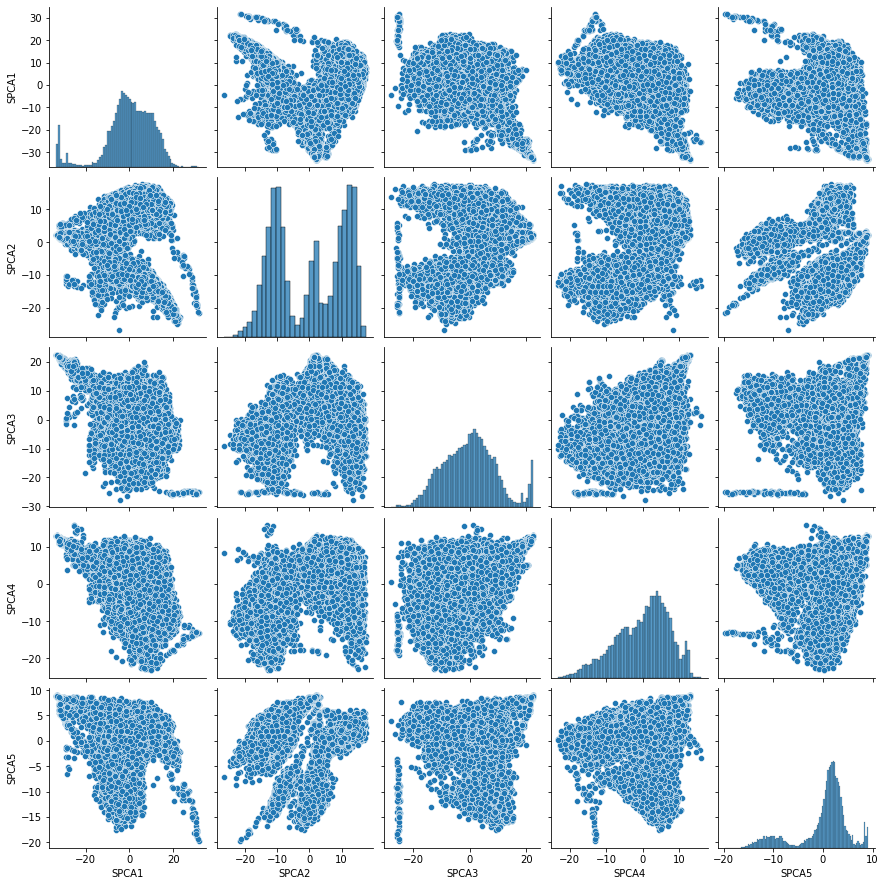

In [11]:
import seaborn as sns
plot_data = pd.DataFrame(X_transformed_no, columns = ['SPCA1','SPCA2','SPCA3','SPCA4','SPCA5'])
sns.pairplot(plot_data)


In [17]:
X = X_transformed_no[:, (1, 4)]
estimate = GaussianMixture(
        n_components=2, covariance_type="diag", max_iter=20, random_state=0
    )
fitted_model = estimator.fit(X)

pred_values = fitted_model.predict(X)
fitted_model.means_


array([[10.10395974,  2.54581009],
       [-9.17562515, -2.3119054 ]])

In [19]:
plot_data['gmm_results'] = pred_values

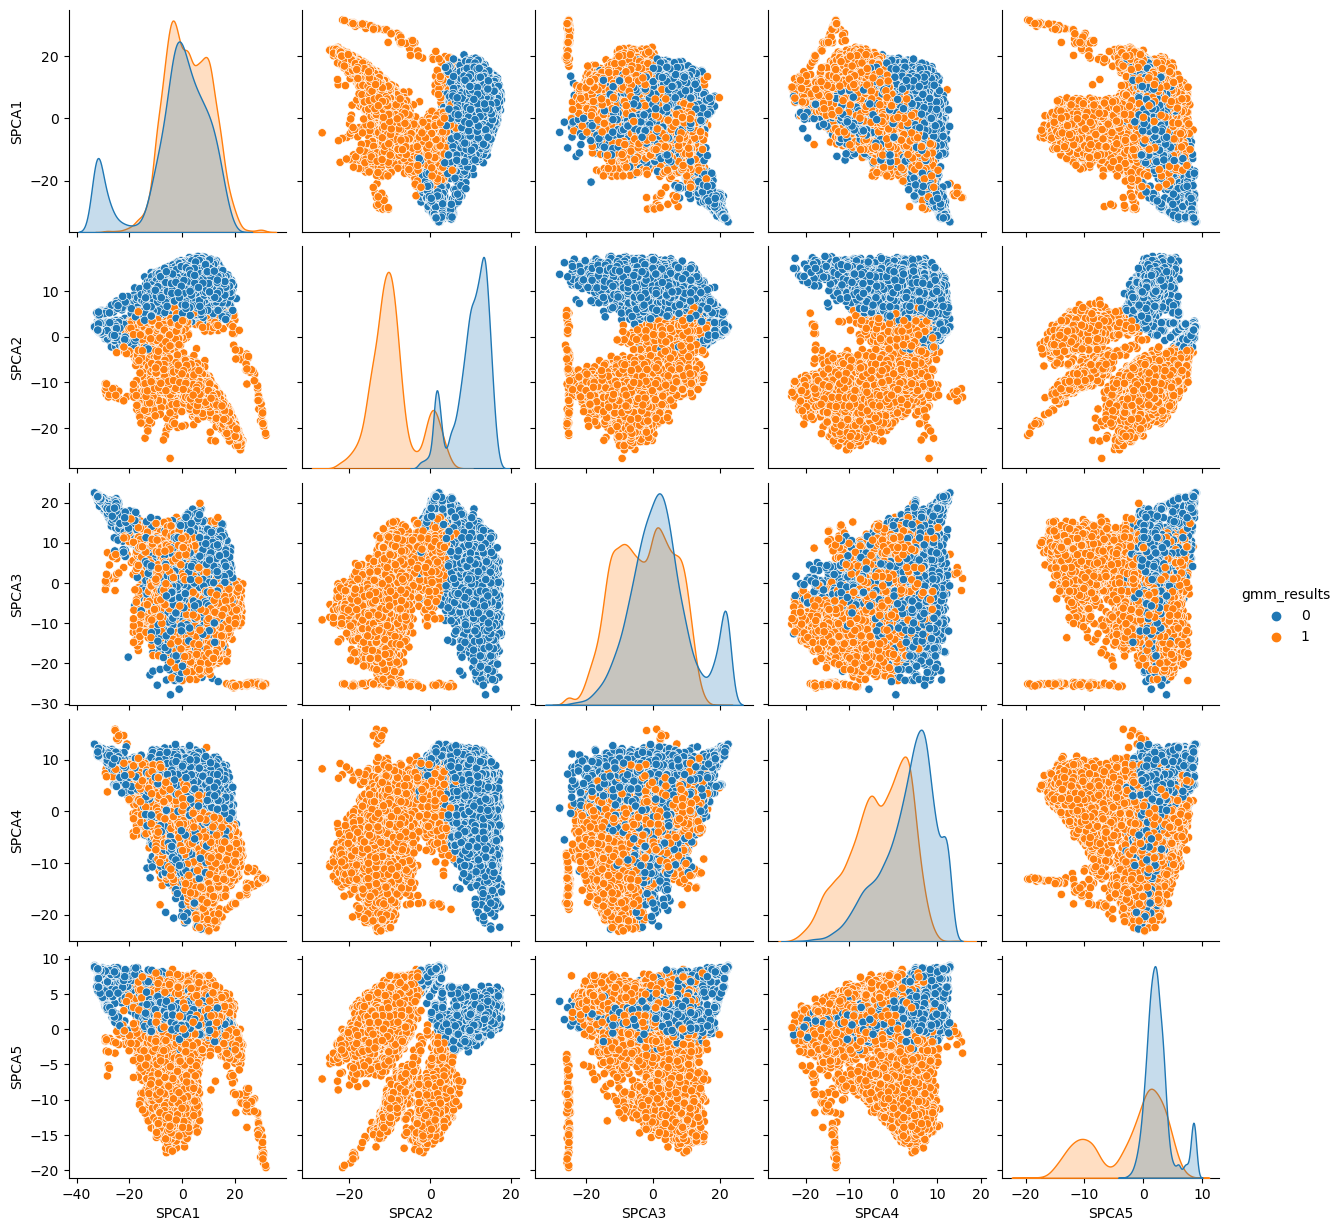

In [20]:
sns.pairplot(plot_data, hue = 'gmm_results')